## Caderno para análise exploratória de dados do COVID-19 no Brasil

Foram utilizados dados das Secretarias de Saúde das Unidades Federativas, tratados por Álvaro Justen e outros colaboradores do Brasil.IO (dados acessados no dia 19 de Novembro de 2020).

### Resumo:
   
Nesse caderno, foi analisado o dataset disponibilizado pelos colaboradores do Brasil.IO sobre o COVID-19 no Brasil. Além de explorar a base de dados, esse estudo responde sobre a possibilidade de estar ocorrendo uma "segunda onda" da pandemia em solo brasileiro. 

Para tratar do objetivo do projeto, foram identificados o número de novos casos diários nos estados do sul do Brasil e então calculadas as médias móveis de cada estado, para comparar com países europeus que estão passando pela segunda onda. 

### Conhecendo o Dataset

In [1]:
# importando as libs necessárias para a EDA e criando os dataframes
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('csv//casos_clean.csv', index_col = 'Unnamed: 0')

C:\Users\bueni\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inicialmente, vamos explorar e tentar entender os dataset disponibilizado no [Brasil.io](https://brasil.io/dataset/covid19/caso/), buscando conhecimento sobre cada uma das váriaveis e sobre o que se observa.  

In [2]:
df.head(5)

,date,day,month,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-19,19,11,AP,NaN,state,55885,785,240,True,845731.0,861773.0,16.0,6484.88639,0.0140
1,2020-11-18,18,11,AP,NaN,state,55652,783,239,False,845731.0,861773.0,16.0,6457.84911,0.0141
2,2020-11-17,17,11,AP,NaN,state,55382,782,238,False,845731.0,861773.0,16.0,6426.51835,0.0141
3,2020-11-16,16,11,AP,NaN,state,55156,780,237,False,845731.0,861773.0,16.0,6400.29335,0.0141
4,2020-11-15,15,11,AP,NaN,state,54979,777,236,False,845731.0,861773.0,16.0,6379.75430,0.0141


In [3]:
df.tail(5)

,date,day,month,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1003177,2020-06-23,23,6,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0
1003178,2020-06-22,22,6,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0
1003179,2020-06-21,21,6,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0
1003180,2020-06-20,20,6,SP,Óleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0
1003181,2020-06-19,19,6,SP,Óleo,city,1,0,1,False,2496.0,2471.0,3533809.0,40.46945,0.0


In [4]:
df.shape

(1003182, 15)

Como visto acima, é um dataset com aproximadamente 1 milhão de observações. Além das colunas disponibilizadas originalmente no arquivo, adicionei - durante a limpeza dos dados - colunas para o dia e para o mês. Segue abaixo as informações sobre as váriaveis de cada coluna de [acordo com o Brasil.io](https://github.com/turicas/covid19-br/blob/master/api.md#casos)

Colunas:

- `date`: data de coleta dos dados no formato YYYY-MM-DD.
- `state`: sigla da unidade federativa, exemplo: SP.
- `city`: nome do município (pode estar em branco quando o registro é
  referente ao estado, pode ser preenchido com `Importados/Indefinidos`
  também).
- `place_type`: tipo de local que esse registro descreve, pode ser `city` ou
  `state`.
- `order_for_place`: número que identifica a ordem do registro para este
  local. O registro referente ao primeiro boletim em que esse local aparecer
  será contabilizado como `1` e os demais boletins incrementarão esse valor.
- `is_last`: campo pré-computado que diz se esse registro é o mais novo para
  esse local, pode ser `True` ou `False`.
- `city_ibge_code`: código IBGE do local.
- `confirmed`: número de casos confirmados.
- `deaths`: número de mortes.
- `estimated_population`: população estimada para esse município/estado em
  2020, [segundo o
  IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados).
- `estimated_population_2019`: população estimada para esse município/estado em
  2019, [segundo o
  IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados).

- `confirmed_per_100k_inhabitants`: número de casos confirmados por 100.000
  habitantes (baseado em `estimated_population`).
- `death_rate`: taxa de mortalidade (mortes / confirmados).

Vamos explorar agora os números do dataset usando funções padrão do pandas. 

In [5]:
df.nunique()

date                                 269
day                                   31
month                                 10
state                                 27
city                                5297
place_type                             2
confirmed                          19082
deaths                              4559
order_for_place                      263
is_last                                2
estimated_population_2019           5102
estimated_population                5148
city_ibge_code                      5596
confirmed_per_100k_inhabitants    389393
death_rate                          2036
dtype: int64

São observações de 269 datas diferentes, sobre todos os estados brasileiros. O dataset possui informações de cerca de 5300 cidades diferentes, além de informações diretas sobre o total de cada estado.

In [6]:
pd.options.display.float_format = "{:,.4f}".format

df[['confirmed', 'deaths', 'estimated_population', 'confirmed_per_100k_inhabitants', 'death_rate']].describe()

,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate
count,"1,003,182.0000","1,003,182.0000","999,325.0000","985,744.0000","1,003,182.0000"
mean,"1,131.9514",36.4445,"98,832.2295","1,104.4113",0.0350
std,"14,066.4308",524.3850,"1,034,508.1492","1,413.5372",0.0910
min,0.0000,0.0000,776.0000,0.0022,0.0000
25%,13.0000,0.0000,"6,122.0000",132.8021,0.0000
50%,64.0000,1.0000,"13,565.0000",619.7577,0.0150
75%,272.0000,6.0000,"30,395.0000","1,555.1195",0.0345
max,"1,191,290.0000","41,074.0000","46,289,333.0000","22,789.8712",1.0000


Utilizando o df.describe() observamos os dados estatísticos básicos do dataset. Esperamos os desvios-padrões altos pois o dataset possui cidades de todo o Brasil, com diversos tamanhos e culturas diferentes.  

Podemos verificar a existência de valores NaN pela contagem de cada uma das váriaveis. Eles são esperados pois diversas cidades entregam dados sem contabiliza-los como de vindos do próprio munícipio (no caso de pacientes originais de outros países/estados). O resultado são diversas cidades com nome de "Importados/Indefinidos", sem população estimada nem possibilidade de calcular os confirmados/100mil habitantes. Isso também causa anomalias como o quociente de morte ser igual a 1.

O número ainda maior de valores NaN na coluna do 'confirmed_per_100k_inhabitants' é causado pelas cidades que entregaram dados sem ter nenhum caso. 


In [7]:
df[df['city'] == 'Importados/Indefinidos'].loc[:,['state','city', 'place_type', 'confirmed', 'deaths',
                                                  'estimated_population_2019', 'estimated_population', 'city_ibge_code',
                                                  'confirmed_per_100k_inhabitants', 'death_rate']]

,state,city,place_type,confirmed,deaths,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
28313,AL,Importados/Indefinidos,city,8,8,nan,nan,nan,nan,1.0000
28314,AL,Importados/Indefinidos,city,8,8,nan,nan,nan,nan,1.0000
28315,AL,Importados/Indefinidos,city,8,8,nan,nan,nan,nan,1.0000
28316,AL,Importados/Indefinidos,city,8,8,nan,nan,nan,nan,1.0000
28317,AL,Importados/Indefinidos,city,8,8,nan,nan,nan,nan,1.0000
...,...,...,...,...,...,...,...,...,...,...
926124,SP,Importados/Indefinidos,city,0,0,nan,nan,nan,nan,0.0000
926125,SP,Importados/Indefinidos,city,0,0,nan,nan,nan,nan,0.0000
926126,SP,Importados/Indefinidos,city,0,0,nan,nan,nan,nan,0.0000
926127,SP,Importados/Indefinidos,city,8,0,nan,nan,nan,nan,0.0000


In [8]:
df[np.logical_and(df['confirmed_per_100k_inhabitants'].isna(),
                  df['confirmed'] == 0)].loc[:,['state','city', 'place_type', 'confirmed', 'deaths', 
                                                'estimated_population_2019', 'estimated_population', 
                                                'city_ibge_code', 'confirmed_per_100k_inhabitants', 'death_rate']]

,state,city,place_type,confirmed,deaths,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
5454,AC,Jordão,city,0,0,"8,317.0000","8,473.0000","1,200,328.0000",nan,0.0000
5455,AC,Jordão,city,0,0,"8,317.0000","8,473.0000","1,200,328.0000",nan,0.0000
5456,AC,Jordão,city,0,0,"8,317.0000","8,473.0000","1,200,328.0000",nan,0.0000
5457,AC,Jordão,city,0,0,"8,317.0000","8,473.0000","1,200,328.0000",nan,0.0000
5458,AC,Jordão,city,0,0,"8,317.0000","8,473.0000","1,200,328.0000",nan,0.0000
...,...,...,...,...,...,...,...,...,...,...
994196,SP,Tarumã,city,0,0,"15,000.0000","15,183.0000","3,553,955.0000",nan,0.0000
994197,SP,Tarumã,city,0,0,"15,000.0000","15,183.0000","3,553,955.0000",nan,0.0000
994198,SP,Tarumã,city,0,0,"15,000.0000","15,183.0000","3,553,955.0000",nan,0.0000
999818,SP,Vargem Grande Paulista,city,0,1,"52,597.0000","53,468.0000","3,556,453.0000",nan,0.0000


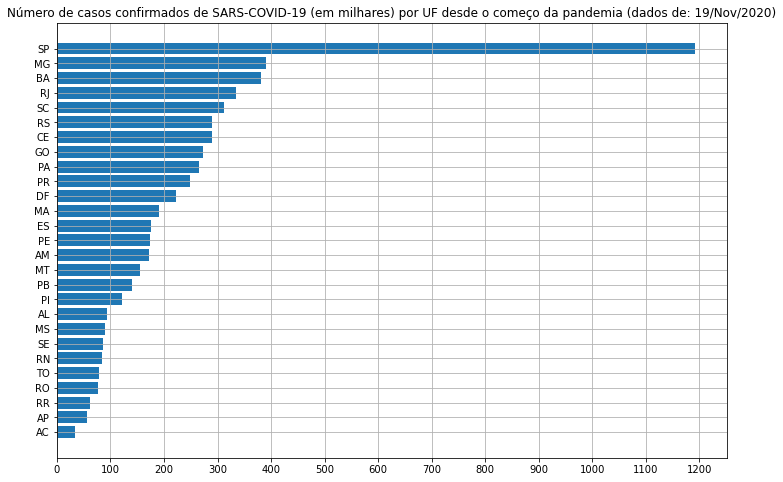

In [76]:
fig, ax = plt.subplots(figsize = (12,8))
df_last_states = df.loc[(df.place_type == 'state') & (df.is_last == True)].sort_values(by = 'confirmed', ascending = True)

ax.barh(df_last_states.state, df_last_states.confirmed/1000)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.title('''Número de casos confirmados de SARS-COVID-19 (em milhares) por UF desde o começo da pandemia (dados de: 19/Nov/2020)''')
plt.grid()
plt.show()

### Trabalhando com os estados da Região Sul

Depois de explorar um pouco do dataset, focarei a análise do COVID nos estados da Região Sul e tentar entender os fatores que influenciaram a queda e o segundo aumento no número de casos (acontecendo agora).

In [9]:
df_sul = df.loc[(df['state'] == 'RS') | (df['state'] == 'SC') | (df['state'] == 'PR')]

In [10]:
df_sul.loc[df.is_last == True].head(10)

,date,day,month,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
592975,2020-11-19,19,11,PR,NaN,state,248853,5827,251,True,"11,433,957.0000","11,516,840.0000",41.0000,"2,160.7750",0.0234
593226,2020-11-18,18,11,PR,Abatiá,city,92,1,189,True,"7,457.0000","7,408.0000","4,100,103.0000","1,241.9007",0.0109
593415,2020-11-18,18,11,PR,Adrianópolis,city,184,4,155,True,"5,919.0000","5,857.0000","4,100,202.0000","3,141.5400",0.0217
593570,2020-11-18,18,11,PR,Agudos do Sul,city,92,1,188,True,"9,371.0000","9,470.0000","4,100,301.0000",971.4889,0.0109
593758,2020-11-18,18,11,PR,Almirante Tamandaré,city,2312,65,228,True,"118,623.0000","120,041.0000","4,100,400.0000","1,926.0086",0.0281
593986,2020-11-18,18,11,PR,Altamira do Paraná,city,19,2,168,True,"1,942.0000","1,682.0000","4,100,459.0000","1,129.6076",0.1053
594154,2020-11-18,18,11,PR,Alto Paraná,city,175,1,209,True,"14,770.0000","14,859.0000","4,100,608.0000","1,177.7374",0.0057
594363,2020-11-18,18,11,PR,Alto Paraíso,city,8,0,176,True,"2,741.0000","2,685.0000","4,128,625.0000",297.9516,0.0000
594539,2020-11-18,18,11,PR,Alto Piquiri,city,120,4,150,True,"9,836.0000","9,778.0000","4,100,707.0000","1,227.2448",0.0333
594689,2020-11-18,18,11,PR,Altônia,city,202,3,150,True,"22,056.0000","22,176.0000","4,100,509.0000",910.8947,0.0149


In [11]:
last_data_ufs = df_sul.loc[(df.place_type == 'state') & (df.is_last == True)]

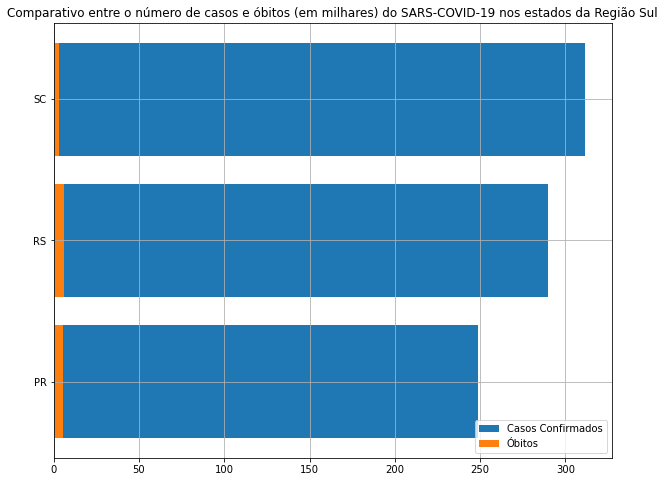

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(last_data_ufs.state, last_data_ufs['confirmed']/1000, label = 'Casos Confirmados')
ax.barh(last_data_ufs.state, last_data_ufs[ 'deaths']/1000, label = 'Óbitos')


plt.grid()
plt.legend(loc = 'lower right')
plt.title('Comparativo entre o número de casos e óbitos (em milhares) do SARS-COVID-19 nos estados da Região Sul')

plt.show()

In [13]:
last_data_ufs[['state', 'estimated_population']]

,state,estimated_population
592975,PR,"11,516,840.0000"
703442,RS,"11,422,973.0000"
824828,SC,"7,252,502.0000"


Como é possível observar, o estado de Santa Catarina - apesar de ter a menor população entre os 3 estados da Região Sul - é o estado com maior número de casos confirmados. Além disso, podemos perceber a diferença entre no número de casos entre o Rio Grande do Sul e o Paraná, apesar das populações de ambos estados serem praticamente iguais.

Vamos observar o evolutivo de casos entre os estados para tentar entender mais sobre esses valores.

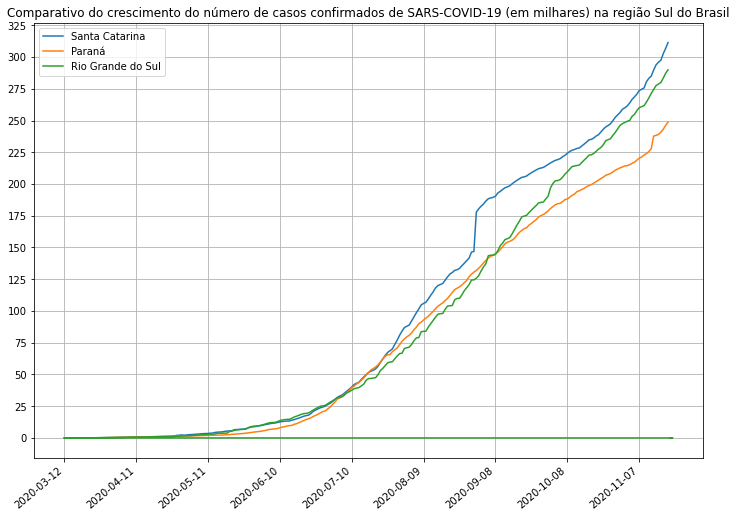

In [14]:
df_sul_uf = df_sul.loc[df.place_type == 'state'].sort_values(by = 'date')

fig, ax = plt.subplots(figsize = (12, 8))

ufs = {'SC':'Santa Catarina', 'PR':'Paraná', 'RS':'Rio Grande do Sul'}

for uf, label in ufs.items():
    ax.plot(df_sul_uf.date.loc[df_sul_uf.state == uf], 
            df_sul_uf['confirmed'].loc[df_sul_uf.state == uf]/1000, label = label)
    plt.legend()

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

plt.title('Comparativo do crescimento do número de casos confirmados de SARS-COVID-19 (em milhares) na região Sul do Brasil')
plt.grid()
plt.show()

É notável que o número no estado de Santa Catarina continua subindo num ritmo bem mais acelerado que os outros estados da região. Observamos também uma queda no aumento de novos casos no Paraná.

Irei agora criar uma coluna com o número de novos casos registrados por estado a cada ordem, para identificar os últimos picos da doença e tentar identificar a possibilidade de uma chamada "segunda onda" do vírus.

In [37]:
new_cases = (df_sul_uf.groupby(['state'])['confirmed']
                        .diff()
                        .fillna(df_sul_uf['confirmed'])
                        .astype(int))

df_sul_uf.insert(8, 'new_cases', new_cases)

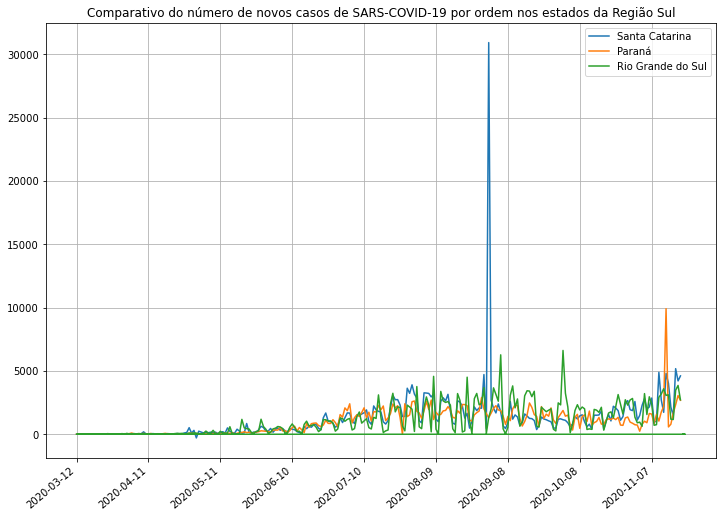

In [46]:
fig, ax = plt.subplots(figsize = (12, 8))

ufs = {'SC':'Santa Catarina', 'PR':'Paraná', 'RS':'Rio Grande do Sul'}

for uf, label in ufs.items():
    ax.plot(df_sul_uf.date.loc[df_sul_uf.state == uf], df_sul_uf.new_cases.loc[df_sul_uf.state == uf], label = label)
    
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

plt.title('Comparativo do número de novos casos de SARS-COVID-19 por ordem nos estados da Região Sul')
plt.legend()
plt.grid()

O gráfico possui um ápice anomálico entre o mês de Agosto e Setembro para o estado de Santa Catarina, alcançando mais de 30 mil casos e impossibilitando-nos de observar melhor os outros valores no gráfico. Uma rápida pesquisa nos principais portais de notícias brasileiros e descobrimos o motivo: [uma falha na base de dados estadual.](https://g1.globo.com/sc/santa-catarina/noticia/2020/08/31/sc-tem-mais-328-mil-casos-de-covid-19-confirmados-apos-falha-em-sistema-ser-identificada-pelo-governo.ghtml)

Irei limitar o eixo Y para 8 mil casos para que o skew não atrapalhe a visualização.

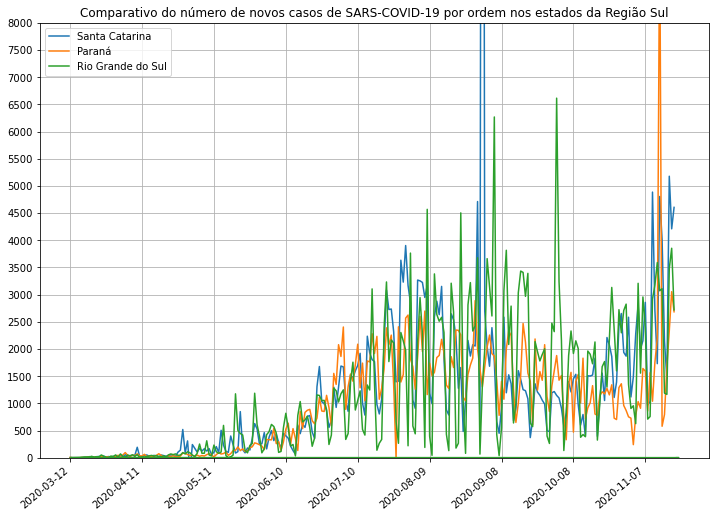

In [56]:
fig, ax = plt.subplots(figsize = (12, 8))

for uf, label in ufs.items():
    ax.plot(df_sul_uf.date.loc[df_sul_uf.state == uf], df_sul_uf.new_cases.loc[df_sul_uf.state == uf], label = label)
    
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax.set_ylim(0,8000)
plt.title('Comparativo do número de novos casos de SARS-COVID-19 por ordem nos estados da Região Sul')
plt.legend()
plt.grid()

Não encontrei nada sobre o aumento expressivo de novos casos no Paraná em Novembro. Minha hipótese é que tenha acontecido algo parecido com o aumento de Santa Catarina, visto que nos dias anteriores ao skew o número de casos parece menor. 

Já podemos observar que, apesar da queda no número de novos casos entre os meses de Agosto e Setembro, em nenhum momento apresenta-se uma queda real no número de novos casos como aconteceu em países vivendo uma segunda onda. 

Devido à natureza dos updates de novos casos, um gráfico de linha com cada update não nos mostra muito. Irei utilizar um gráfico com a média móvel dos últimos 14 dias para cada um dos estados da região Sul para que as linhas não fiquem tão enviesadas. 

In [100]:
df_sul_uf

,date,day,month,state,city,place_type,confirmed,deaths,new_cases,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
703692,2020-03-10,10,3,RS,NaN,state,1,0,1,1,False,"11,377,239.0000","11,422,973.0000",43.0000,0.0088,0.0000
703691,2020-03-11,11,3,RS,NaN,state,2,0,1,2,False,"11,377,239.0000","11,422,973.0000",43.0000,0.0175,0.0000
825080,2020-03-12,12,3,SC,NaN,state,2,0,2,1,False,"7,164,788.0000","7,252,502.0000",42.0000,0.0276,0.0000
593225,2020-03-12,12,3,PR,NaN,state,6,0,6,1,False,"11,433,957.0000","11,516,840.0000",41.0000,0.0521,0.0000
703690,2020-03-12,12,3,RS,NaN,state,4,0,2,3,False,"11,377,239.0000","11,422,973.0000",43.0000,0.0350,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703443,2020-11-18,18,11,RS,NaN,state,287204,6356,3853,250,False,"11,377,239.0000","11,422,973.0000",43.0000,"2,514.2666",0.0221
592976,2020-11-18,18,11,PR,NaN,state,246169,5793,3054,250,False,"11,433,957.0000","11,516,840.0000",41.0000,"2,137.4700",0.0235
824828,2020-11-19,19,11,SC,NaN,state,311393,3405,4605,253,True,"7,164,788.0000","7,252,502.0000",42.0000,"4,293.5941",0.0109
703442,2020-11-19,19,11,RS,NaN,state,289923,6410,2719,251,True,"11,377,239.0000","11,422,973.0000",43.0000,"2,538.0696",0.0221


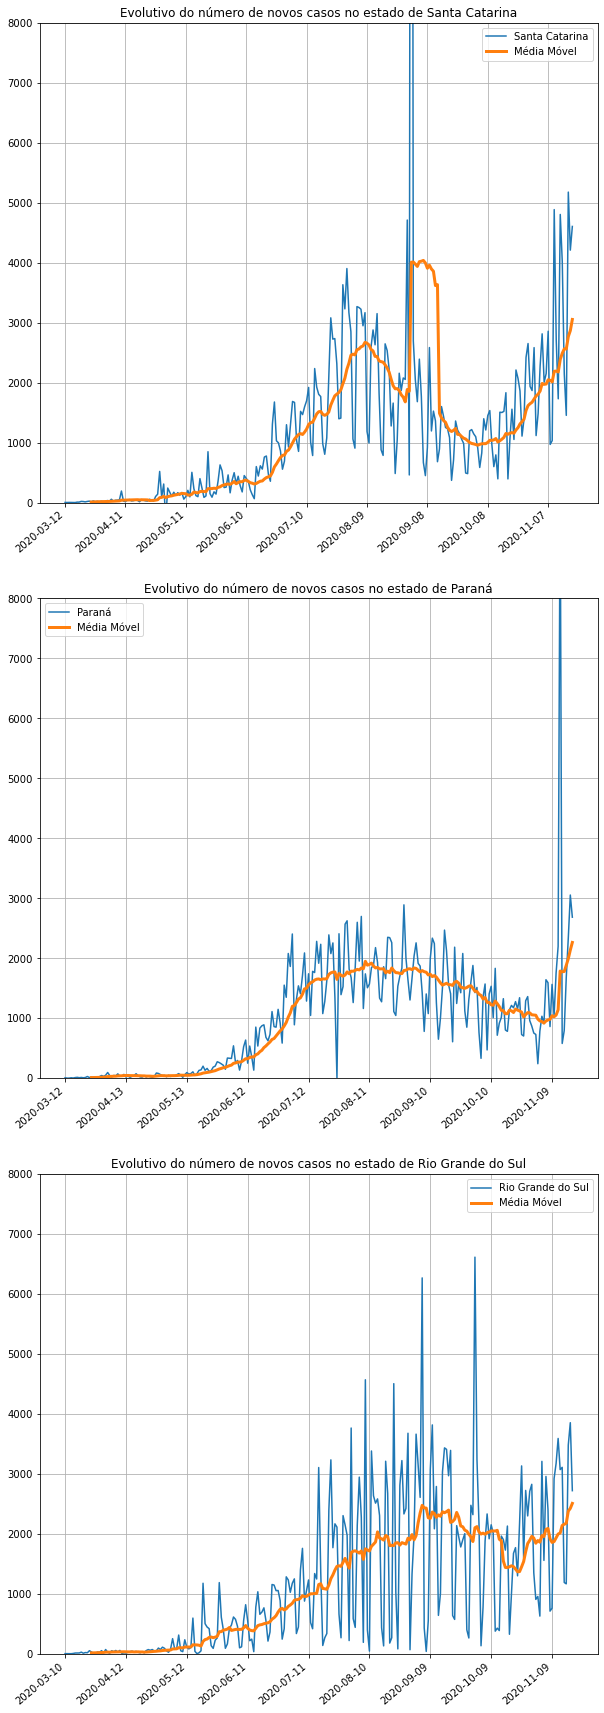

In [125]:
fig, axs = plt.subplots(3, figsize = (10, 30))

ufs = {'SC':['Santa Catarina', 0], 'PR': ['Paraná', 1], 'RS': ['Rio Grande do Sul', 2]}

for key, value in ufs.items(): 
    axs[value[1]].plot(df_sul_uf.date.loc[df_sul_uf.state == key], 
            df_sul_uf.new_cases.loc[df_sul_uf.state == key], 
            label = value[0])

    axs[value[1]].plot(df_sul_uf.date.loc[df_sul_uf.state == key], 
            df_sul_uf.loc[df_sul_uf.state == key].new_cases.rolling(14).mean(),
            label = 'Média Móvel', linewidth=3)
    
    axs[value[1]].xaxis.set_major_locator(ticker.MultipleLocator(30))
    
    for label in axs[value[1]].get_xticklabels():
            label.set_rotation(40)
            label.set_horizontalalignment('right')
    
    axs[value[1]].set_ylim(0,8000)
        
    axs[value[1]].legend()
    axs[value[1]].grid()
    axs[value[1]].set_title(f'Evolutivo do número de novos casos no estado de {value[0]}')
    
plt.show()


Com a média móvel plotada, podemos reafirmar a hipótese de que não há uma segunda onda acontencendo nos estados sulistas brasileiros, uma vez que eles ainda estão na primeira onda. Podemos verificar uma pequena queda nos últimos meses do plot no **crescimento** do número de novos casos, mas esse número não fica abaixo de mil em nenhum momento.

Em países europeus que estão vivenciando uma segunda onda, os gráficos de novos casos são bem diferentes (vide [Portugal](https://www.bing.com/covid/local/portugal?vert=graph), [Espanha](https://www.bing.com/covid/local/spain?vert=graph) e [Itália](https://www.bing.com/covid/local/italy?vert=graph))